In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを作成
data = {
    'A': ['Group1']*5 + ['Group2']*5 + ['Group3']*5,
    'B': np.random.randint(10, 50, size=15),
    'C': ['Label'+str(i) for i in range(1,6)]*3
}

# データフレームを作成
df = pd.DataFrame(data)

print(df)

         A   B       C
0   Group1  29  Label1
1   Group1  40  Label2
2   Group1  20  Label3
3   Group1  23  Label4
4   Group1  36  Label5
5   Group2  30  Label1
6   Group2  45  Label2
7   Group2  17  Label3
8   Group2  15  Label4
9   Group2  29  Label5
10  Group3  32  Label1
11  Group3  42  Label2
12  Group3  39  Label3
13  Group3  25  Label4
14  Group3  17  Label5


In [ ]:
# 可読性と再利用可能性の向上:
# あなたのコードはmatplotlibのグラフ作成処理に特化していますが、関数化することで再利用性と可読性を高めることができます。
# 関数化することで、同じ操作を何度も書く必要がなくなり、エラーの可能性も低減します。

# スタイル設定の最適化:
# matplotlibのスタイル設定は、特定のグラフではなくすべてのグラフに適用されます。
# したがって、ループ内でplt.rcParams['font.family'] = 'sans-serif'を設定すると、この設定が残りのすべてのグラフに影響を与えます。
# この設定はループの外に移動すべきです

def draw_pie(df, group_label):
    # グループごとのカラムBの合計値を計算
    total_sum = df.groupby('A')['B'].sum()

    # 特定のグループのデータを取得
    group = df[df['A'] == group_label]

    # 各カラムBの値が全体に対して占める割合を計算
    ratios = group['B'] / total_sum[group_label]

    # カラムBの昇順に並べ替え
    sorted_indices = group['B'].argsort()
    ratios = ratios.iloc[sorted_indices]
    labels = group['C'].iloc[sorted_indices]

    # 円グラフを描画。カラムCの値をラベルとして使用。
    wedges, text_labels, autopct_labels = plt.pie(ratios, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})

    # タイトルを設定
    plt.title(f'カラムA: {group_label}')
    plt.tight_layout()  # レイアウトを自動調整
    plt.show()

# フォントを設定
plt.rcParams['font.family'] = 'Meiryo'

# カラムAの各値ごとにループ
for label in df['A'].unique():
    draw_pie(df, label)


In [ ]:
# より汎用的な関数を作成したい場合は、カラム名を引数として取り、任意のデータフレームとカラムに対して動作するように設計することも可能です。
# 例えば以下のように変更可能です

import matplotlib.pyplot as plt

def draw_pie(df, group_col, value_col, label_col, group_label):
    # グループごとの値の合計を計算
    total_sum = df.groupby(group_col)[value_col].sum()

    # 特定のグループのデータを取得
    group = df[df[group_col] == group_label]
    
    # 各値が全体に対して占める割合を計算
    ratios = group[value_col] / total_sum[group_label]
    
    # 値の昇順に並べ替え
    sorted_indices = group[value_col].argsort()
    ratios = ratios.iloc[sorted_indices]
    labels = group[label_col].iloc[sorted_indices]

    # 円グラフを描画。指定のカラムの値をラベルとして使用。
    wedges, text_labels, autopct_labels = plt.pie(ratios, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})

    # タイトルを設定
    plt.title(f'{group_col}: {group_label}')
    plt.tight_layout()  # レイアウトを自動調整
    plt.show()

# フォントを設定
plt.rcParams['font.family'] = 'Meiryo'

# グループカラムの各値ごとにループ
for label in df['A'].unique():
    draw_pie(df, 'A', 'B', 'C', label)


In [ ]:
# plt.subplotsを用いると、描画のためのFigureオブジェクトとAxesオブジェクトを同時に生成することができます。
# そのため、次のようにコードを書き換えることができます：

import matplotlib.pyplot as plt

def draw_pie(df, group_col, value_col, label_col, group_label):
    # グループごとの値の合計を計算
    total_sum = df.groupby(group_col)[value_col].sum()

    # 特定のグループのデータを取得
    group = df[df[group_col] == group_label]
    
    # 各値が全体に対して占める割合を計算
    ratios = group[value_col] / total_sum[group_label]
    
    # 値の昇順に並べ替え
    sorted_indices = group[value_col].argsort()
    ratios = ratios.iloc[sorted_indices]
    labels = group[label_col].iloc[sorted_indices]

    # FigureとAxesオブジェクトを作成
    fig, ax = plt.subplots()

    # 円グラフを描画。指定のカラムの値をラベルとして使用。
    wedges, text_labels, autopct_labels = ax.pie(ratios, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})

    # タイトルを設定
    ax.set_title(f'{group_col}: {group_label}')
    
    # レイアウトを自動調整
    fig.tight_layout()  
    
    # グラフを表示
    plt.show()

# フォントを設定
plt.rcParams['font.family'] = 'Meiryo'

# グループカラムの各値ごとにループ
for label in df['A'].unique():
    draw_pie(df, 'A', 'B', 'C', label)

In [ ]:
# 与えられたラベルの数（group_labels）に基づいてサブプロットの行数と列数を決定します：

import matplotlib.pyplot as plt
import numpy as np

def draw_pie(ax, df, group_col, value_col, label_col, group_label):
    # グループごとの値の合計を計算
    total_sum = df.groupby(group_col)[value_col].sum()

    # 特定のグループのデータを取得
    group = df[df[group_col] == group_label]
    
    # 各値が全体に対して占める割合を計算
    ratios = group[value_col] / total_sum[group_label]
    
    # 値の昇順に並べ替え
    sorted_indices = group[value_col].argsort()
    ratios = ratios.iloc[sorted_indices]
    labels = group[label_col].iloc[sorted_indices]

    # 円グラフを描画。指定のカラムの値をラベルとして使用。
    wedges, text_labels, autopct_labels = ax.pie(ratios, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})

    # タイトルを設定
    ax.set_title(f'{group_col}: {group_label}')

# フォントを設定
plt.rcParams['font.family'] = 'Meiryo'

group_labels = df['A'].unique()

n = len(group_labels)
cols = 3
rows = n // cols
rows += n % cols

fig, axs = plt.subplots(rows, cols, figsize=(cols*6, rows*6))

for ax, label in zip(axs.ravel(), group_labels):
    draw_pie(ax, df, 'A', 'B', 'C', label)

# 余分なsubplotを削除
for i in range(len(group_labels), rows*cols):
    fig.delaxes(axs.flatten()[i])

fig.tight_layout()  # レイアウトを自動調整
plt.show()


In [ ]:
# それぞれのグループに対して複数のラベルを持つ棒グラフを生成するためには、
# 各棒グラフが複数のラベルを持つようにデータを適切に分割する必要があります。

# 以下に、それぞれのグループについて一つの棒グラフを生成し、その棒グラフを各ラベルで色分けするコードを示します。

import matplotlib.pyplot as plt
import numpy as np

def draw_stacked_bar(ax, df, group_col, value_col, label_col, group_label):
    # グループごとの値の合計を計算
    total_sum = df.groupby(group_col)[value_col].sum()

    # 特定のグループのデータを取得
    group = df[df[group_col] == group_label]
    
    # 値の昇順に並べ替え
    sorted_indices = group[value_col].argsort()
    sorted_values = group[value_col].iloc[sorted_indices]
    sorted_labels = group[label_col].iloc[sorted_indices]
    
    # 棒グラフの底部を描画するための初期位置
    bottom = 0

    for value, label in zip(sorted_values, sorted_labels):
        # 棒グラフを描画。指定のカラムの値をラベルとして使用。
        ax.bar(group_label, value, bottom=bottom, label=label)

        # 次の棒グラフの底部を更新
        bottom += value

    # タイトルを設定
    ax.set_title(f'{group_col}: {group_label}')
    ax.legend()

# フォントを設定
plt.rcParams['font.family'] = 'Meiryo'

group_labels = df['A'].unique()

n = len(group_labels)
cols = 3
rows = n // cols
rows += n % cols

fig, axs = plt.subplots(rows, cols, figsize=(cols*2, rows*6))

for ax, label in zip(axs.ravel(), group_labels):
    draw_stacked_bar(ax, df, 'A', 'B', 'C', label)

# 余分なsubplotを削除
for i in range(len(group_labels), rows*cols):
    fig.delaxes(axs.flatten()[i])

fig.tight_layout()  # レイアウトを自動調整
plt.show()


In [2]:
# 100%棒グラフ

def draw_stacked_bar(ax, df, group_col, value_col, label_col, group_label):
    """
    Stacked bar plot を描画する関数

    Parameters
    ----------
    ax: matplotlib.axes.Axes
        描画対象の Axes
    df: pandas.DataFrame
        データフレーム
    group_col: str
        グループ名が含まれている列名
    value_col: str
        値が含まれている列名
    label_col: str
        ラベルが含まれている列名
    group_label: str
        描画対象のグループのラベル名
    """
    # グループごとの値の合計を計算
    total_sum = df.groupby(group_col)[value_col].sum()

    # 特定のグループのデータを取得
    group = df[df[group_col] == group_label]
    # 値の降順に並べ替え
    group = group.sort_values(value_col, ascending=False)
    # 値をパーセントに変換
    group[value_col] = group[value_col] / total_sum[group_label] * 100
    
    # 棒グラフの底部を描画するための初期位置
    bottom = 0

    for value, label in zip(group[value_col], group[label_col]):
        # 棒グラフを描画。指定のカラムの値をラベルとして使用。
        ax.bar(group_label, value, bottom=bottom, label=label)

        # 次の棒グラフの底部を更新
        bottom += value

    # タイトルを設定
    ax.set_title(f'{group_col}: {group_label}')
    ax.set_ylabel('Percent')

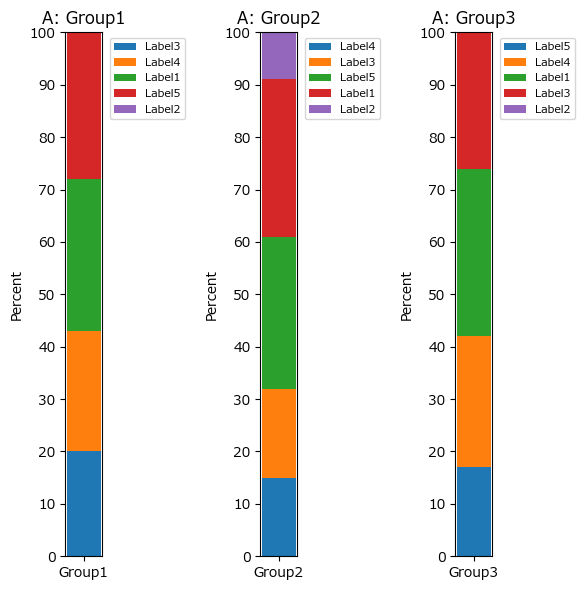

In [10]:
# フォントを設定
plt.rcParams['font.family'] = 'Meiryo'

group_labels = df['A'].unique()

n = len(group_labels)
cols = 3
rows = n // cols
rows += n % cols

fig, axs = plt.subplots(rows, cols, figsize=(cols*2, rows*6))

for ax, label in zip(axs.ravel(), group_labels):
    draw_stacked_bar(ax, df, 'A', 'B', 'C', label)
    # y軸の範囲を0から100に設定
    ax.set_ylim(0, 100)
    ax.set_yticks(np.arange(0, 101, 10))
    ax.set_ylabel('Percent')
    # 凡例の設定
    ax.legend(bbox_to_anchor=(1.05, 1),
              loc='upper left',
              fontsize=8,
              )

# 余分なsubplotを削除
for i in range(len(group_labels), rows*cols):
    fig.delaxes(axs.flatten()[i])

fig.tight_layout()  # レイアウトを自動調整

plt.show()